In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/Copy of winequality-red.csv")


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


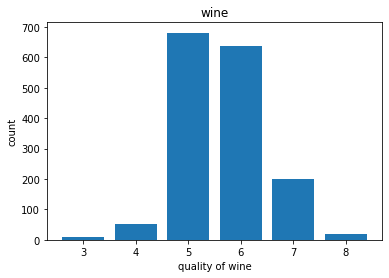

In [8]:
df=pd.read_csv("/content/drive/MyDrive/Copy of winequality-red.csv")
qu=df["quality"].value_counts().sort_index()
plt.bar(qu.index.astype(str),qu)
plt.xlabel("quality of wine")
plt.ylabel("count")
plt.title("wine")
plt.show()

In [9]:
print(df.isnull().sum)

<bound method DataFrame.sum of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0             False             False        False  ...      False    False    False
1             False             False        False  ...      False    False    False
2             False             False        False  ...      False    False    False
3             False             False        False  ...      False    False    False
4             False             False        False  ...      False    False    False
...             ...               ...          ...  ...        ...      ...      ...
1594          False             False        False  ...      False    False    False
1595          False             False        False  ...      False    False    False
1596          False             False        False  ...      False    False    False
1597          False             False        False  ...      False    False    False
1598          False             Fa

In [10]:
df['goodquality']=[1 if x >= 6 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']
df['goodquality'].value_counts()

1    855
0    744
Name: goodquality, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [13]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       185
           1       0.76      0.80      0.78       215

    accuracy                           0.76       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400



In [15]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       185
           1       0.79      0.83      0.81       215

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [16]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       185
           1       0.74      0.73      0.74       215

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



In [17]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       185
           1       0.78      0.77      0.77       215

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



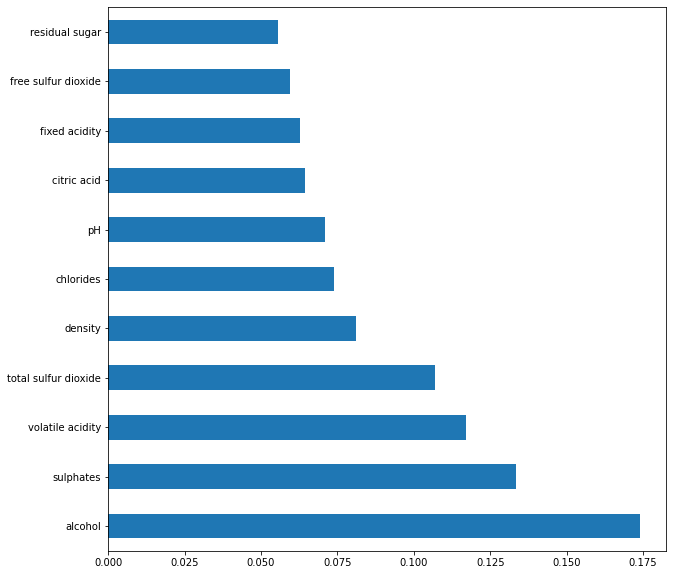

In [18]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [19]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0
mean,8.142204,0.589503,0.237755,2.54207,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882,0.0
std,1.572396,0.177956,0.183368,1.39355,0.055781,10.890291,36.720468,0.001598,0.154296,0.176194,0.758007,0.339894,0.0
min,4.600000,0.180000,0.000000,1.20000,0.039000,3.000000,6.000000,0.992560,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.460000,0.080000,1.90000,0.074000,8.000000,23.750000,0.996120,3.200000,0.520000,9.400000,5.000000,0.0
50%,7.800000,0.590000,0.220000,2.20000,0.081000,14.000000,45.000000,0.996935,3.310000,0.580000,9.700000,5.000000,0.0
75%,8.900000,0.680000,0.360000,2.60000,0.094000,23.000000,78.000000,0.997900,3.400000,0.650000,10.300000,5.000000,0.0
max,15.900000,1.580000,1.000000,15.50000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,5.000000,0.0
